<div style="background-color: #e6f7ff; padding: 20px; border-radius: 10px; text-align: center; border: 1px solid #b3e0ff;">
    <h1 style="font-size: 2.5em; margin-bottom: 10px; color: #005580;">Project 1</h1>
    <h2 style="font-size: 2em; font-weight: normal; color: #007acc;">(OMAR MALAEB)</h2>
</div>

<a href="https://colab.research.google.com/github/OmarMlaeb/AAI614_Malaeb/blob/master/Week%204/Project_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Data Analysis

In 1995 Kohavi and Becker extracted and cleaned data (https://archive.ics.uci.edu/dataset/2/adult) from the 1994 US Census. It went on to be used as a benchmark dataset for many papers. In this project, we will work with this dataset to explore patterns of income and consider how time and location may alter or confound these relationships.

## Data exploration

In [ ]:
!pip install ucimlrepo

In [ ]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
adult = fetch_ucirepo(id=2)

# data (as pandas dataframes)
X = adult.data.features
y = adult.data.targets

# metadata
print(adult.metadata)

# variable information
print(adult.variables)

{'uci_id': 2, 'name': 'Adult', 'repository_url': 'https://archive.ics.uci.edu/dataset/2/adult', 'data_url': 'https://archive.ics.uci.edu/static/public/2/data.csv', 'abstract': 'Predict whether annual income of an individual exceeds $50K/yr based on census data. Also known as "Census Income" dataset. ', 'area': 'Social Science', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 48842, 'num_features': 14, 'feature_types': ['Categorical', 'Integer'], 'demographics': ['Age', 'Income', 'Education Level', 'Other', 'Race', 'Sex'], 'target_col': ['income'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 1996, 'last_updated': 'Tue Sep 24 2024', 'dataset_doi': '10.24432/C5XW20', 'creators': ['Barry Becker', 'Ronny Kohavi'], 'intro_paper': None, 'additional_info': {'summary': "Extraction was done by Barry Becker from the 1994 Census database.  A set of reasonably clean records was extracted using the fol

### 1. Check the columns of your data. Are they the expected data types based on their descriptions in this text file description of the data?

In [ ]:
import pandas as pd
import requests
from bs4 import BeautifulSoup
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import Select
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.chrome.options import Options
import time

In [ ]:
# setting up chrome options for headless mode
chrome_options = Options()
chrome_options.add_argument("--headless") # opens chrome in the background
chrome_options.add_argument("--disable-gpu")
chrome_options.add_argument("--window-size=1920,1080")

# initializing WebDriver
driver = webdriver.Chrome(options=chrome_options)

# function to fetch data from the page using maximum 5 retries (i added this case because some times the page isnt refreshed well)
def fetch_table_data(driver, max_retries=5):
    retry_count = 0
    while retry_count < max_retries:
        try:
            # navigating to the page
            url = 'https://archive.ics.uci.edu/dataset/2/adult'
            driver.get(url)

            # waiting for the dropdown to load and then slecting 15 rows
            wait = WebDriverWait(driver, 30)
            dropdown = wait.until(EC.presence_of_element_located((By.CSS_SELECTOR, 'select.select-primary')))
            select = Select(dropdown)
            select.select_by_value('15')

            print("Dropdown set to:", dropdown.get_attribute('value'))

            # waiting for the table to reload after selection
            def table_rows_updated(driver):
                table = driver.find_element(By.TAG_NAME, 'table')
                rows = table.find_elements(By.TAG_NAME, 'tr')
                return len(rows) > 11  # ensuring more than 11 rows are loaded

            wait.until(table_rows_updated)

            # parsing the updated page with BeautifulSoup
            soup = BeautifulSoup(driver.page_source, 'html.parser')

            # extracting the table data
            table = soup.find_all('table')[0]
            headers = [header.text.strip() for header in table.find_all('th')]
            rows = []
            for row in table.find_all('tr')[1:]:
                cols = row.find_all('td')
                rows.append([col.text.strip() for col in cols])

            # creating a DataFrame
            df = pd.DataFrame(rows, columns=headers)
            return df

        except Exception as e:
            print(f"Attempt {retry_count + 1} failed: {e}")
            retry_count += 1
            time.sleep(2)  # waiting before retrying

    raise Exception("Failed to fetch data after maximum retries.")

# fetching the data and then printing it
try:
    df = fetch_table_data(driver)
    print(df)
except Exception as e:
    print(e)
finally:
    driver.quit()


Dropdown set to: 15
Attempt 1 failed: Message: 

Dropdown set to: 15
     Variable Name     Role         Type      Demographic  \
0              age  Feature      Integer              Age   
1        workclass  Feature  Categorical           Income   
2           fnlwgt  Feature      Integer                    
3        education  Feature  Categorical  Education Level   
4    education-num  Feature      Integer  Education Level   
5   marital-status  Feature  Categorical            Other   
6       occupation  Feature  Categorical            Other   
7     relationship  Feature  Categorical            Other   
8             race  Feature  Categorical             Race   
9              sex  Feature       Binary              Sex   
10    capital-gain  Feature      Integer                    
11    capital-loss  Feature      Integer                    
12  hours-per-week  Feature      Integer                    
13  native-country  Feature  Categorical            Other   
14          inco

In [ ]:
# displaying the rows of features and target
print("Features:")
print(X.head())
print("\nTarget:")
print(y.head())

# checking data types and non-null counts
print("\nFeatures Info:")
print(X.info())

print("\nTarget Info:")
print(y.info())

# checking for missing values
missing_values = X.isnull().sum()
print("\nMissing Values:")
print(missing_values[missing_values > 0])

Features:
   age         workclass  fnlwgt  education  education-num  \
0   39         State-gov   77516  Bachelors             13   
1   50  Self-emp-not-inc   83311  Bachelors             13   
2   38           Private  215646    HS-grad              9   
3   53           Private  234721       11th              7   
4   28           Private  338409  Bachelors             13   

       marital-status         occupation   relationship   race     sex  \
0       Never-married       Adm-clerical  Not-in-family  White    Male   
1  Married-civ-spouse    Exec-managerial        Husband  White    Male   
2            Divorced  Handlers-cleaners  Not-in-family  White    Male   
3  Married-civ-spouse  Handlers-cleaners        Husband  Black    Male   
4  Married-civ-spouse     Prof-specialty           Wife  Black  Female   

   capital-gain  capital-loss  hours-per-week native-country  
0          2174             0              40  United-States  
1             0             0              13 

In [ ]:
# defining the scraped types
scraped_types = df.set_index('Variable Name')['Type'].to_dict()

# extracting actual data types from your dataset
actual_types = X.dtypes.to_dict()

# mpping scraped types to correct pandas types
for col in actual_types:
    expected_type = scraped_types.get(col, 'Not Found')

    # adjust the scraped type
    if expected_type == 'Integer':
        expected_type = 'int64'
    elif expected_type in ['Categorical', 'Binary']:
        expected_type = 'object'

    actual_type = actual_types[col]
    print(f"Column: {col}, Expected Type: {expected_type}, Actual Type: {actual_type}, Match: {expected_type == actual_type}")

Column: age, Expected Type: int64, Actual Type: int64, Match: True
Column: workclass, Expected Type: object, Actual Type: object, Match: True
Column: fnlwgt, Expected Type: int64, Actual Type: int64, Match: True
Column: education, Expected Type: object, Actual Type: object, Match: True
Column: education-num, Expected Type: int64, Actual Type: int64, Match: True
Column: marital-status, Expected Type: object, Actual Type: object, Match: True
Column: occupation, Expected Type: object, Actual Type: object, Match: True
Column: relationship, Expected Type: object, Actual Type: object, Match: True
Column: race, Expected Type: object, Actual Type: object, Match: True
Column: sex, Expected Type: object, Actual Type: object, Match: True
Column: capital-gain, Expected Type: int64, Actual Type: int64, Match: True
Column: capital-loss, Expected Type: int64, Actual Type: int64, Match: True
Column: hours-per-week, Expected Type: int64, Actual Type: int64, Match: True
Column: native-country, Expected 

Numerical columns (age, fnlwgt, education-num, capital-gain, capital-loss, hours-per-week) are correctly identified as int64 (integer)
and as expected.
Categorical columns (workclass, education, marital-status, occupation, relationship, race, sex, native-country) are correctly identified as object and as expected.
The missing values match the metadata and they appear in the categorical columns as expected.
workclass has 963 missing values.
occupation has 966 missing values.
native-country has 274 missing values.

### 2. How are missing values represented in this data? Cast missing values to np.nan, if necessary. Count the number of missing values in each column.

In [ ]:
import numpy as np

In [ ]:
# identifying how missing values are represented
print("Unique values in 'workclass':\n", X['workclass'].unique())
print("\nUnique values in 'occupation':\n", X['occupation'].unique())
print("\nUnique values in 'native-country':\n", X['native-country'].unique())

# replacing '?' with nan
X.replace('?', np.nan, inplace=True)

print("\nAfter replacement")

# checking if replacement went right
print("\nUnique values in 'workclass':\n", X['workclass'].unique())
print("\nUnique values in 'occupation':\n", X['occupation'].unique())
print("\nUnique values in 'native-country':\n", X['native-country'].unique())

# counting missing values after replacement
missing_values = X.isnull().sum()
print("\nMissing Values")
print(missing_values)

Unique values in 'workclass':
 ['State-gov' 'Self-emp-not-inc' 'Private' 'Federal-gov' 'Local-gov' '?'
 'Self-emp-inc' 'Without-pay' 'Never-worked' nan]

Unique values in 'occupation':
 ['Adm-clerical' 'Exec-managerial' 'Handlers-cleaners' 'Prof-specialty'
 'Other-service' 'Sales' 'Craft-repair' 'Transport-moving'
 'Farming-fishing' 'Machine-op-inspct' 'Tech-support' '?'
 'Protective-serv' 'Armed-Forces' 'Priv-house-serv' nan]

Unique values in 'native-country':
 ['United-States' 'Cuba' 'Jamaica' 'India' '?' 'Mexico' 'South'
 'Puerto-Rico' 'Honduras' 'England' 'Canada' 'Germany' 'Iran'
 'Philippines' 'Italy' 'Poland' 'Columbia' 'Cambodia' 'Thailand' 'Ecuador'
 'Laos' 'Taiwan' 'Haiti' 'Portugal' 'Dominican-Republic' 'El-Salvador'
 'France' 'Guatemala' 'China' 'Japan' 'Yugoslavia' 'Peru'
 'Outlying-US(Guam-USVI-etc)' 'Scotland' 'Trinadad&Tobago' 'Greece'
 'Nicaragua' 'Vietnam' 'Hong' 'Ireland' 'Hungary' 'Holand-Netherlands' nan]

After replacement

Unique values in 'workclass':
 ['State-

C:\Users\user\AppData\Local\Temp\ipykernel_9736\2987642956.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.replace('?', np.nan, inplace=True)


In the dataset missing values are likely represented as "?" as inspected in the above columns knowing that they have missing values. So, we have to replace the "?" with nan this would increase the number of missing values in the columns.

### 3. Individually plot the distributions of capital_gain and capital_loss. Do you think these variables should be transformed into categorical variables? Why or why not? If yes, create a new variable(s) with your suggested transformation and plot or describe in a table the distribution of the new categorical variable(s).

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

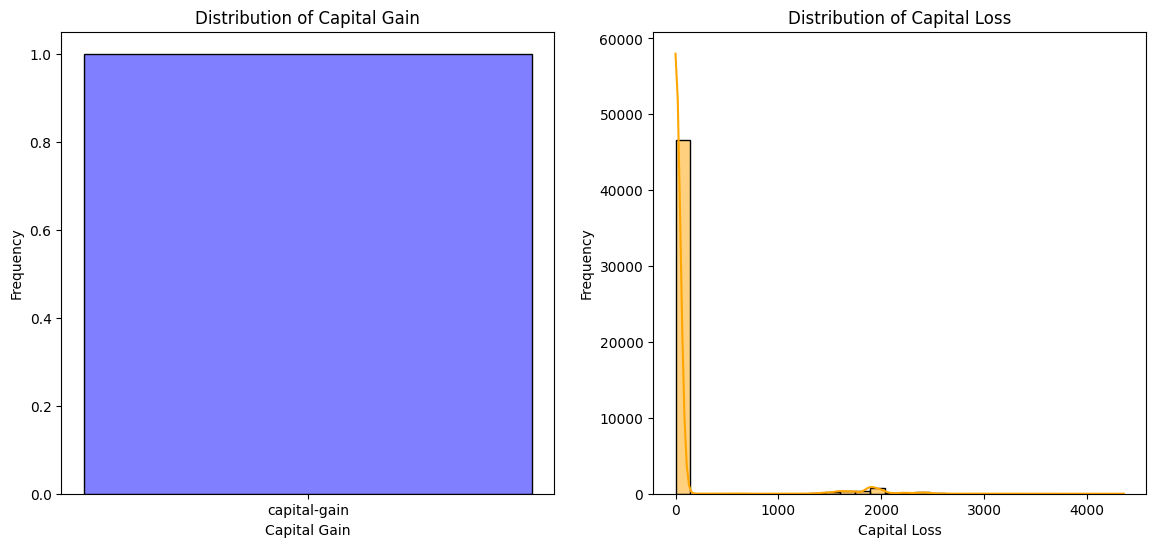

Capital Gain Description:
 count    48842.000000
mean      1079.067626
std       7452.019058
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max      99999.000000
Name: capital-gain, dtype: float64

Capital Loss Description:
 count    48842.000000
mean        87.502314
std        403.004552
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max       4356.000000
Name: capital-loss, dtype: float64


In [ ]:
# ploting distributions of capital gain and capital loss
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

sns.histplot(['capital-gain'], kde=True, bins=30, ax=axes[0], color='blue')
axes[0].set_title('Distribution of Capital Gain')
axes[0].set_xlabel('Capital Gain')
axes[0].set_ylabel('Frequency')

sns.histplot(X['capital-loss'], kde=True, bins=30, ax=axes[1], color='orange')
axes[1].set_title('Distribution of Capital Loss')
axes[1].set_xlabel('Capital Loss')
axes[1].set_ylabel('Frequency')
plt.show()

# analysis of data
print("Capital Gain Description:\n", X['capital-gain'].describe())
print("\nCapital Loss Description:\n", X['capital-loss'].describe())

In both Capital Gain and Capital Loss most values are zero and the distribution is skewed showing only a small part of the data in the non zero range, so converting the data in those columns to categories like None, Low, Medium, and High simplifies the data and makes it easier to analyze especially when exploring relationships with other variables.


Capital Gain Categories:
 capital-gain-category
None      44807
High       2451
Medium     1503
Low          81
Name: count, dtype: int64

Capital Loss Categories:
 capital-loss-category
None      46560
Medium     2237
Low          45
Name: count, dtype: int64


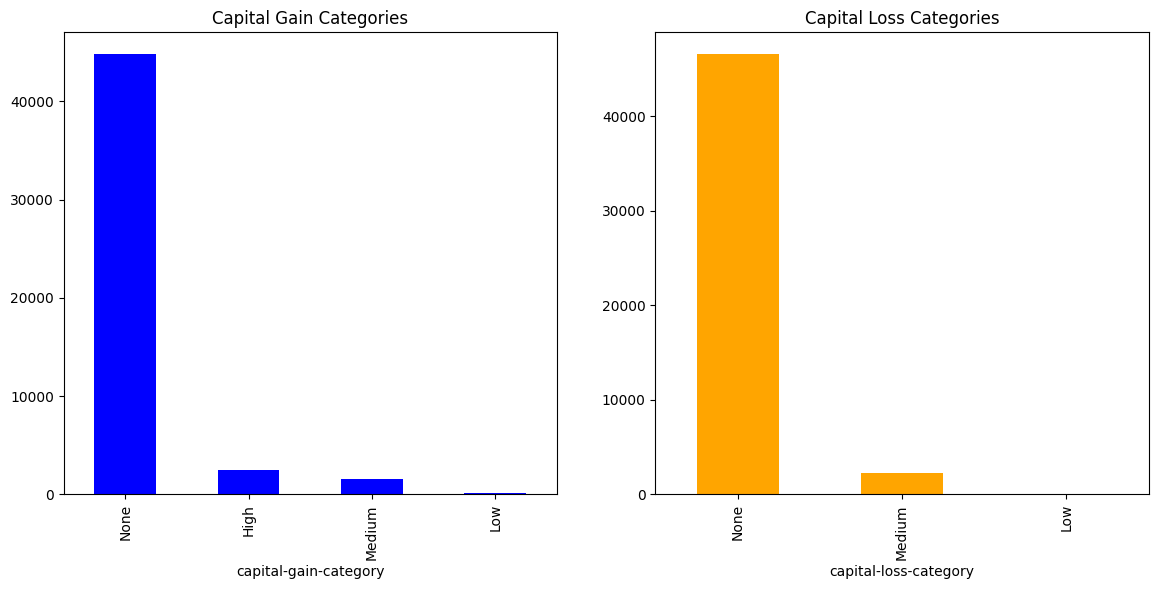

In [ ]:
# transforming into categorical variables
def transformCapital(value):
    if value == 0:
        return 'None'
    elif value <= 1000:
        return 'Low'
    elif value <= 5000:
        return 'Medium'
    else:
        return 'High'

# creating new categorical variables
X['capital-gain-category'] = X['capital-gain'].apply(transformCapital)
X['capital-loss-category'] = X['capital-loss'].apply(transformCapital)

# ploting the distributions of the new categorical variables
gain_counts = X['capital-gain-category'].value_counts()
loss_counts = X['capital-loss-category'].value_counts()

print("\nCapital Gain Categories:\n", gain_counts)
print("\nCapital Loss Categories:\n", loss_counts)

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

gain_counts.plot(kind='bar', ax=axes[0], color='blue', title='Capital Gain Categories')
loss_counts.plot(kind='bar', ax=axes[1], color='orange', title='Capital Loss Categories')

plt.show()

### 4. The sampling weights in the dataset are contained in the variable fnlwgt. The weights indicate the share of the population that the sample represents based on location (and sometimes, other factors). More information is provided in this text file description of the data. Plot or numerically explore the distribution of fnlwgt. Is the variable symmetrically distributed? Compare the distribution of this variable between men and women and comment on any trends you notice. Should outliers be excluded? If you think yes, set the fnlwgt values for those you deem to be outliers as missing for the remainder of your analyses.

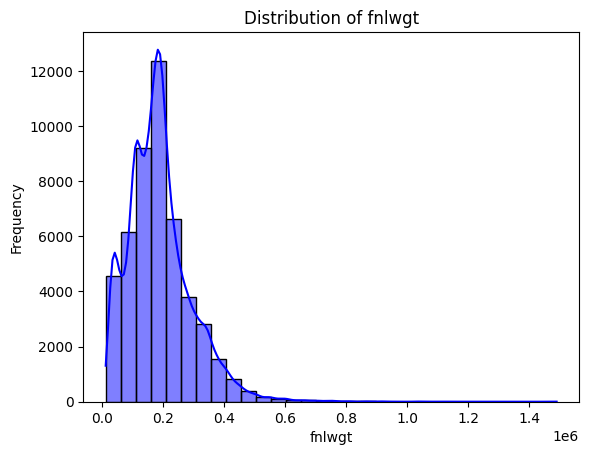


Summary Statistics:

count    4.884200e+04
mean     1.896641e+05
std      1.056040e+05
min      1.228500e+04
25%      1.175505e+05
50%      1.781445e+05
75%      2.376420e+05
max      1.490400e+06
Name: fnlwgt, dtype: float64


In [ ]:
# plotting the distribution of fnlwgt
sns.histplot(X['fnlwgt'], kde=True, bins=30, color='blue')
plt.title('Distribution of fnlwgt')
plt.xlabel('fnlwgt')
plt.ylabel('Frequency')
plt.show()

print("\nSummary Statistics:\n")
print(X['fnlwgt'].describe())

The plotted graph shows that the variable is not symmetrically distributed as on the left we have more distribution. Moreover, the mean (1.896641e+05) is higher than the median (1.781445e+05) indicating that the distribution is right-skewed.

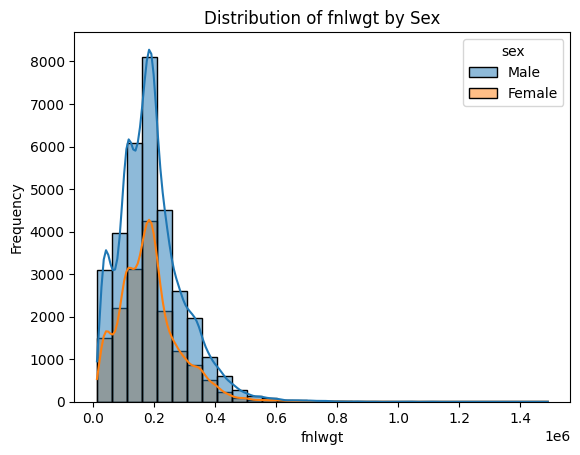

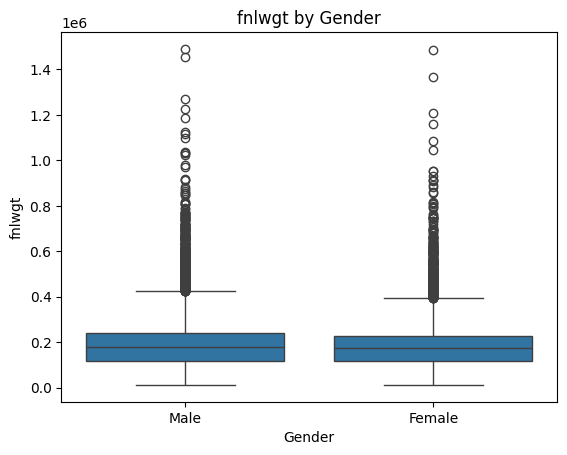

In [ ]:
# comparing distributions by gender
sns.histplot(data= X, x='fnlwgt', hue='sex', kde=True, bins=30)
plt.title('Distribution of fnlwgt by Sex')
plt.xlabel('fnlwgt')
plt.ylabel('Frequency')
plt.show()

# comparing distributions by gender to check for outliers
sns.boxplot(x='sex', y='fnlwgt', data=X)
plt.title('fnlwgt by Gender')
plt.xlabel('Gender')
plt.ylabel('fnlwgt')
plt.show()

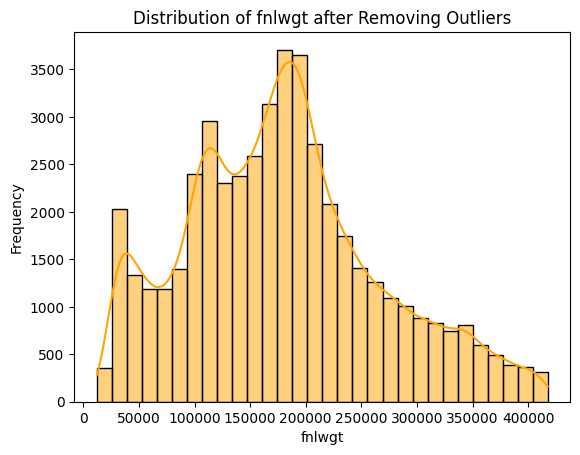


Summary Statistics after Removing Outliers:

count     47389.000000
mean     179687.725611
std       87634.191118
min       12285.000000
25%      115971.000000
50%      175808.000000
75%      229272.000000
max      417668.000000
Name: fnlwgt, dtype: float64


In [ ]:
# identifying outliers using the IQR rule
Q1 = X['fnlwgt'].quantile(0.25)
Q3 = X['fnlwgt'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# marking outliers as missing
X.loc[(X['fnlwgt'] < lower_bound) | (X['fnlwgt'] > upper_bound), 'fnlwgt'] = None

# plotting distribution
sns.histplot(X['fnlwgt'], kde=True, bins=30, color='orange')
plt.title('Distribution of fnlwgt after Removing Outliers')
plt.xlabel('fnlwgt')
plt.ylabel('Frequency')
plt.show()

print("\nSummary Statistics after Removing Outliers:\n")
print(X['fnlwgt'].describe())

## Correlation
### Find the correlations between age, education_num, and hours_per_week.
### 1. Do any of the variables appear to be correlated? How did you make your assessment?

In [ ]:
correlation_matrix = X[['age', 'education-num', 'hours-per-week']].corr()

# displaying the correlation matrix
correlation_matrix

,age,education-num,hours-per-week
age,1.000000,0.030940,0.071558
education-num,0.030940,1.000000,0.143689
hours-per-week,0.071558,0.143689,1.000000


No linear relationship between age and education-num because the correlation is near to zero.
Age slightly incraeses with hours worked per week so there is a weak positive correlation between them
As well as there is also a weak positive correlation between education-num and hours worked per week meaning that ones with higher education levels work more hours per week.

### 2. Statistically test any variable pairs with a correlation coefficient > |0.1| for its difference from 0 and report your result. Is the direction and significance of your finding as expected?

In [ ]:
import numpy as np
from scipy.stats import norm

In [ ]:
# correlation coefficient from the matrix
r = 0.143689

# number of samples from the data
n = len(X)

# fisher transformation
z = 0.5 * np.log((1 + r) / (1 - r))

# standard error for the transformation
se = 1 / np.sqrt(n - 3)

# Z-score in order to test the difference from 0
z_score = z / se

# P-value
p_value = 2 * (1 - norm.cdf(np.abs(z_score)))

print(f"Z-score: {z_score}, p-value: {p_value}")

Z-score: 31.975907544016962, p-value: 0.0


The z score indicates and p value a highly statistically significant correlation between education_num and hours_per_week. However, the result aligns with the expectation that education may influence work hours per week even if the correlation is small.

### 3. How does the correlation (and its significance) between education_num and age compare between male and female participants? Is this expected?

In [ ]:
male_data = X[X['sex'] == 'Male']
female_data = X[X['sex'] == 'Female']

male_corr = male_data[['education-num', 'age']].corr()
female_corr = female_data[['education-num', 'age']].corr()

print("Male Correlation:")
print(male_corr)
print("\nFemale Correlation:")
print(female_corr)

Male Correlation:
               education-num       age
education-num       1.000000  0.054074
age                 0.054074  1.000000

Female Correlation:
               education-num       age
education-num       1.000000 -0.020478
age                -0.020478  1.000000


The correlation between education num and age is very weak for both genders.
For males, the positive correlation shows a very small increase in age with education level.
For females, the negative correlation indicates very weak inverse relationship between education and age.

### 4. Compute the covariance matrix for education_num and hours_per_week. What conclusions can you draw from the covariance matrix?

In [ ]:
cov_matrix = X[['education-num', 'hours-per-week']].cov()
cov_matrix

,education-num,hours-per-week
education-num,6.609901,4.577651
hours-per-week,4.577651,153.547885


Covariance of 4.58 between education num and hours per week indicates a positive relationship. As education_num increases, hours_per_week increase slightly.
The variance of education_num (6.61) and hours_per_week (153.55) shows their respective individual dispersions.

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

In [ ]:
# getting only the required columns
newX = X[['sex', 'hours-per-week']]

# convertting sex to dummy variables
newX = pd.get_dummies(newX, drop_first=True)

# dependent variable
newy = newX['hours-per-week']

# dropping hours-per-week since its the dependent variable
newX = newX.drop(columns=['hours-per-week'])

# training and testing split
newX_train, newX_test, y_train, y_test = train_test_split(newX, newy, test_size=0.2, random_state=42)

# linear regression model
model = LinearRegression()
model.fit(newX_train, y_train)

# printing the coefficients
print(f'Intercept: {model.intercept_}')
print(f'Coefficients: {model.coef_}')

# R-squared
r_squared = model.score(newX_test, y_test)
print(f'R-squared: {r_squared}')

# Cross-validation
cv_scores = cross_val_score(model, newX, newy, cv=5, scoring='neg_mean_squared_error')
print(f'Cross-validation MSE: {-cv_scores.mean()}')

Intercept: 36.403117524499876
Coefficients: [5.98150375]
R-squared: 0.054591685220449104
Cross-validation MSE: 145.5400117574613


In [ ]:
# getting the relevant columns including education_num
newX2 = X[['sex', 'education-num']]

# converting sex to dummy variables
newX2 = pd.get_dummies(newX2, drop_first=True)

# dependent variable
newy2 = X['hours-per-week']

# splitting the data
newX2_train, newX2_test, y_train, y_test = train_test_split(newX2, newy2, test_size=0.2, random_state=42)

# training the linear regression model
model = LinearRegression()
model.fit(newX2_train, y_train)

# printing the coefficients
print(f'Intercept: {model.intercept_}')
print(f'Coefficients: {model.coef_}')

# R-squared value
r_squared = model.score(newX2_test, y_test)
print(f'R-squared: {r_squared}')


Intercept: 29.675098293884844
Coefficients: [0.67004089 5.94494264]
R-squared: 0.07783757581792461


In [ ]:
# adding gross_income_group based on income variable
X['gross_income_group'] = y['income'].apply(lambda x: 1 if x == '>50K' else 0)

newX3 = X[['sex', 'education-num', 'gross_income_group']]

# comverting 'sex' to dummy variables
newX3 = pd.get_dummies(newX3, drop_first=True)

# Dependent variable
newy3 = X['hours-per-week']

# Split data
newX3_train, newX3_test, y_train, y_test = train_test_split(newX3, newy3, test_size=0.2, random_state=42)

# Train linear regression model
model = LinearRegression()
model.fit(newX3_train, y_train)

# Print coefficients
print(f'Intercept: {model.intercept_}')
print(f'Coefficients: {model.coef_}')

# Calculate R-squared
r_squared = model.score(newX3_test, y_test)
print(f'R-squared: {r_squared}')

Intercept: 30.825262721840673
Coefficients: [0.52754417 3.8206541  5.4540167 ]
R-squared: 0.09021026644646069
